In [95]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [96]:
# https://www.kaggle.com/datasets/thedevastator/spotify-tracks-genre-dataset
raw_data = pd.read_csv('./data/train.csv')
raw_data.head()

,Unnamed: 0,track_id,artists,album_name,track_name,popularity,duration_ms,explicit,danceability,energy,...,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre
0,0,5SuOikwiRyPMVoIQDJUgSV,Gen Hoshino,Comedy,Comedy,73,230666,False,0.676,0.4610,...,-6.746,0,0.1430,0.0322,0.000001,0.3580,0.715,87.917,4,acoustic
1,1,4qPNDBW1i3p13qLCt0Ki3A,Ben Woodward,Ghost (Acoustic),Ghost - Acoustic,55,149610,False,0.420,0.1660,...,-17.235,1,0.0763,0.9240,0.000006,0.1010,0.267,77.489,4,acoustic
2,2,1iJBSr7s7jYXzM8EGcbK5b,Ingrid Michaelson;ZAYN,To Begin Again,To Begin Again,57,210826,False,0.438,0.3590,...,-9.734,1,0.0557,0.2100,0.000000,0.1170,0.120,76.332,4,acoustic
3,3,6lfxq3CG4xtTiEg7opyCyx,Kina Grannis,Crazy Rich Asians (Original Motion Picture Sou...,Can't Help Falling In Love,71,201933,False,0.266,0.0596,...,-18.515,1,0.0363,0.9050,0.000071,0.1320,0.143,181.740,3,acoustic
4,4,5vjLSffimiIP26QG5WcN2K,Chord Overstreet,Hold On,Hold On,82,198853,False,0.618,0.4430,...,-9.681,1,0.0526,0.4690,0.000000,0.0829,0.167,119.949,4,acoustic


In [97]:
for col in raw_data.columns:
    print(col, raw_data[col].isnull().sum())

Unnamed: 0 0
track_id 0
artists 1
album_name 1
track_name 1
popularity 0
duration_ms 0
explicit 0
danceability 0
energy 0
key 0
loudness 0
mode 0
speechiness 0
acousticness 0
instrumentalness 0
liveness 0
valence 0
tempo 0
time_signature 0
track_genre 0


In [98]:
# Drop rows with missing values
data = raw_data.dropna()

# Drop the Unnamed, track_id, and album_name columns
data = data.drop(['Unnamed: 0', 'track_id', 'album_name'], axis=1)

# Sort by popularity
data = data.sort_values(by='popularity', ascending=False)

# Convert duration_ms to minutes
data['duration_ms'] = data['duration_ms'] / 60000
data = data.rename(columns={'duration_ms': 'duration (min)'})

data.head()

,artists,track_name,popularity,duration (min),explicit,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre
20001,Sam Smith;Kim Petras,Unholy (feat. Kim Petras),100,2.615717,False,0.714,0.472,2,-7.375,1,0.0864,0.01300,0.000005,0.266,0.238,131.121,4,dance
81051,Sam Smith;Kim Petras,Unholy (feat. Kim Petras),100,2.615717,False,0.714,0.472,2,-7.375,1,0.0864,0.01300,0.000005,0.266,0.238,131.121,4,pop
51664,Bizarrap;Quevedo,"Quevedo: Bzrp Music Sessions, Vol. 52",99,3.315617,False,0.621,0.782,2,-5.548,1,0.0440,0.01250,0.033000,0.230,0.550,128.033,4,hip-hop
89411,Manuel Turizo,La Bachata,98,2.710617,False,0.835,0.679,7,-5.329,0,0.0364,0.58300,0.000002,0.218,0.850,124.980,4,reggaeton
81210,David Guetta;Bebe Rexha,I'm Good (Blue),98,2.920633,True,0.561,0.965,7,-3.673,0,0.0343,0.00383,0.000007,0.371,0.304,128.040,4,pop


In [99]:
# Number of duplicates
dup_count = data['track_name'].value_counts()
print("duplicates per", dup_count)

duplicates per track_name
Run Rudolph Run                            151
Halloween                                   88
Frosty The Snowman                          81
Little Saint Nick - 1991 Remix              76
Last Last                                   75
                                          ... 
I Wanna Change - Housenick Remix             1
Deus de Milagres - Ao Vivo                   1
Around This World (Nikko Culture Remix]      1
Nachbarschaft                                1
A Barrel Of Monkeys                          1
Name: count, Length: 73608, dtype: int64


In [100]:
# Artists with track_name equal to 'Halloween'
data[data['track_name'] == 'Halloween']['artists'].value_counts()

artists
Misfits                      35
AFI                          30
Siouxsie and the Banshees    20
Novo Amor                     1
Stephen Lynch                 1
The Coffinshakers             1
Name: count, dtype: int64

In [101]:
init_count = len(data)
print("tracks currently present:", init_count)

uniq_count = len(data['track_name'].unique())
print("unique tracks:", uniq_count)

data = data.drop_duplicates(['track_name', 'artists'])

final_count = len(data)
print("tracks after dropping duplicates:", final_count)

tracks currently present: 113999
unique tracks: 73608
tracks after dropping duplicates: 81343


# Categorical Columns are:
- Explicit
- Key
- Mode
- Time Signature
- Track Genre


# Popularity by explicity

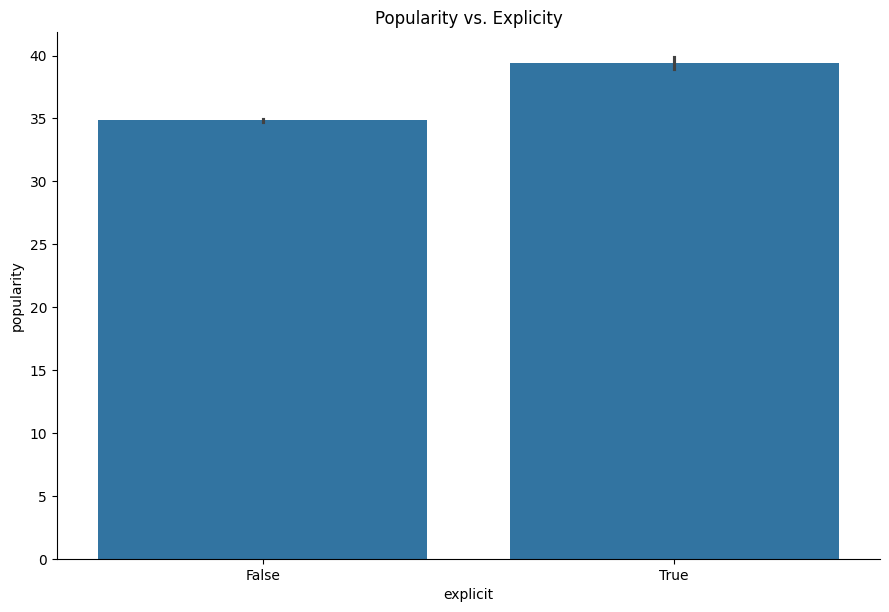

In [102]:
sns.catplot(x='explicit', y='popularity', data=data, kind='bar', height=6, aspect=1.5)
plt.title('Popularity vs. Explicity')
plt.show()

# Popularity by Key
- Key refers to different musical keys assigned integers ranging from 0-11
    - 0 = C
    - 1 = C♯/D♭
    - 2 = D
    - etc
- Knowing the key can provide insights into the mood and tone of a song

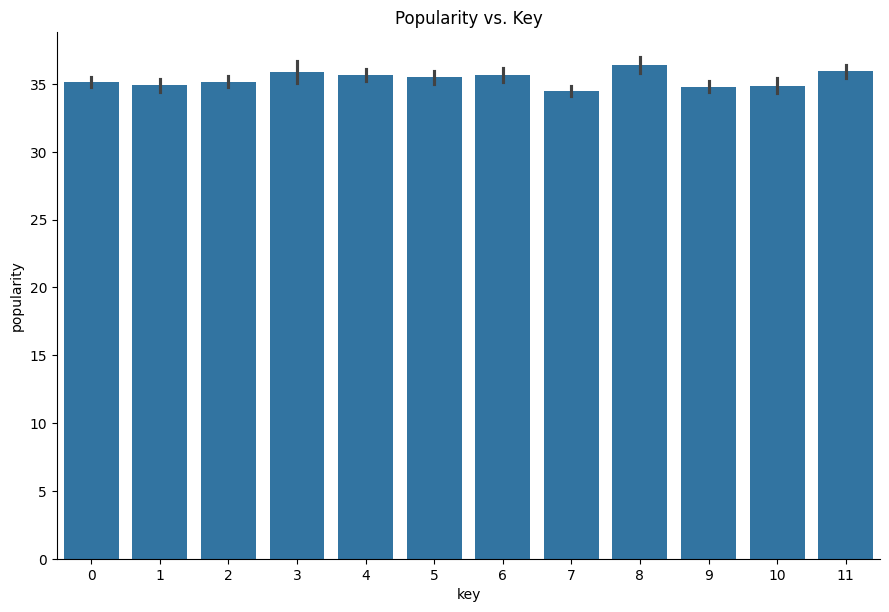

In [103]:
sns.catplot(x='key', y='popularity', data=data, kind='bar', height=6, aspect=1.5)
plt.title('Popularity vs. Key')
plt.show()

# Popularity by Mode
- Mode refers to the tone of the track
    - 0 - minor
    - 1 - major

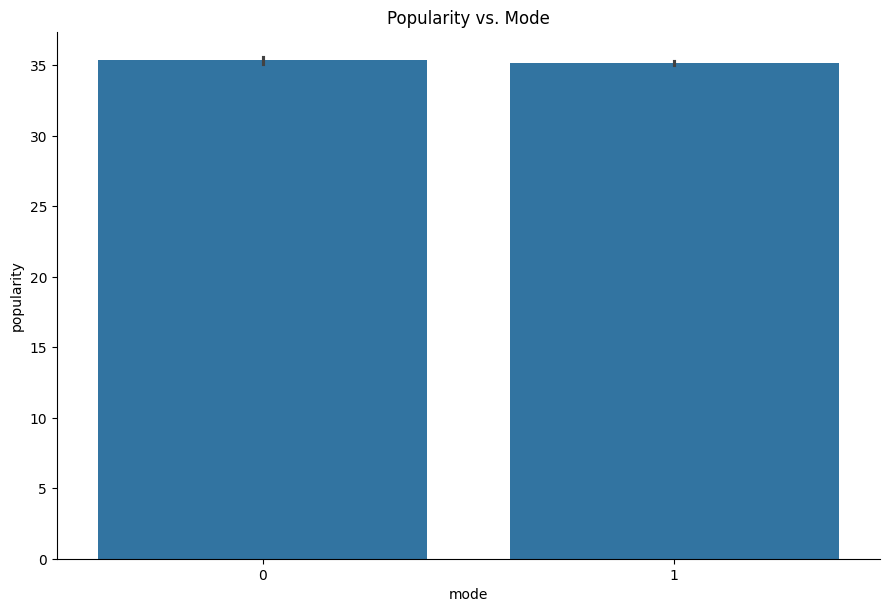

In [104]:
sns.catplot(x='mode', y='popularity', data=data, kind='bar', height=6, aspect=1.5)
plt.title('Popularity vs. Mode')
plt.show()

# Popularity by Time Signature
- Refers to the number of beats within each bar
    - 0 means there is no given time-signature or it is deemed 'free-flowing'

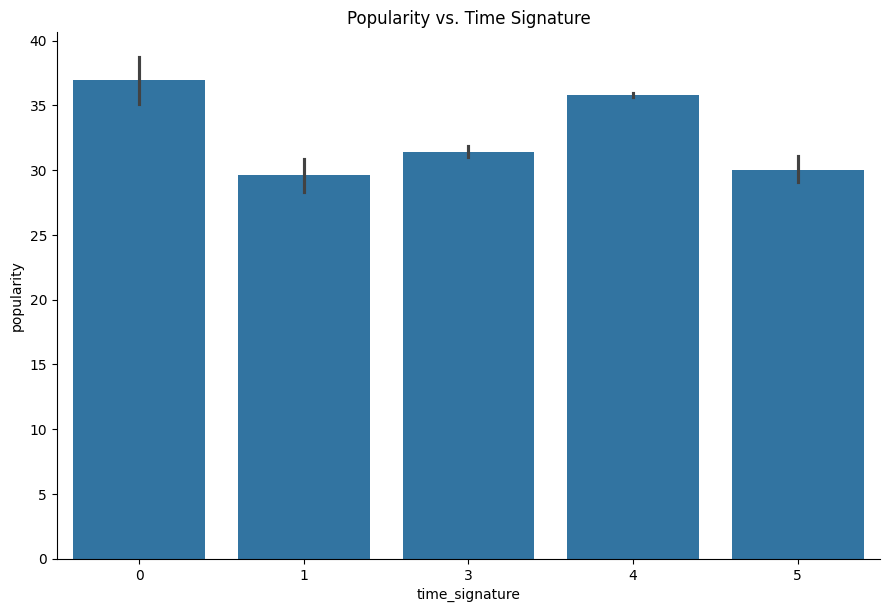

In [105]:
sns.catplot(x='time_signature', y='popularity', data=data, kind='bar', height=6, aspect=1.5)
plt.title('Popularity vs. Time Signature')
plt.show()

# There are 125 genres in the dataset

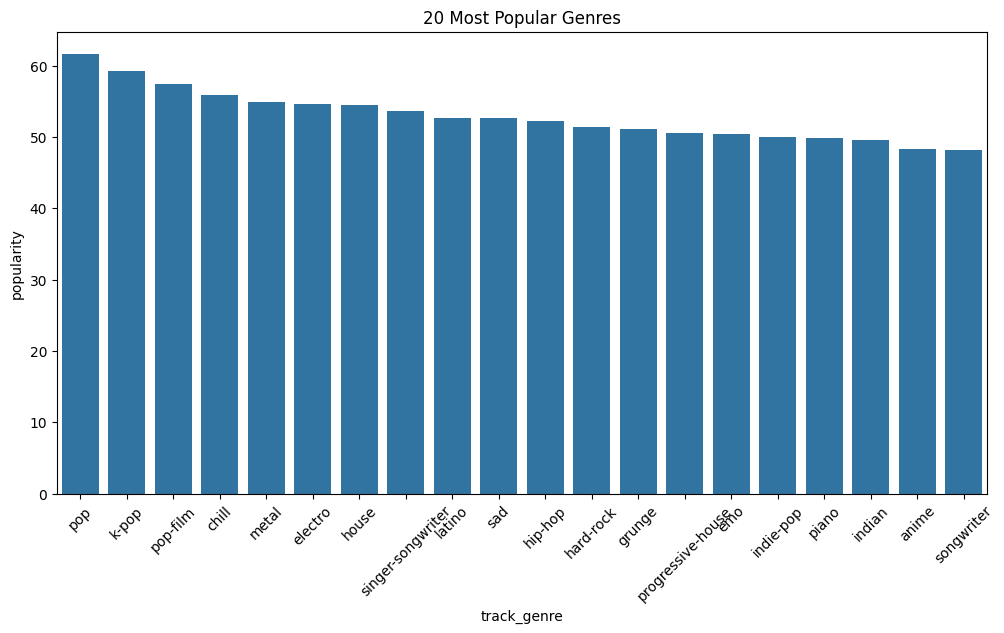

In [106]:
# 20 most popular genres
top_genres = data.groupby('track_genre')['popularity'].mean().sort_values(ascending=False).head(20)
top_genres = top_genres.reset_index()

plt.figure(figsize=(12, 6))
sns.barplot(x='track_genre', y='popularity', data=top_genres)
plt.title('20 Most Popular Genres')
plt.xticks(rotation=45)
plt.show()

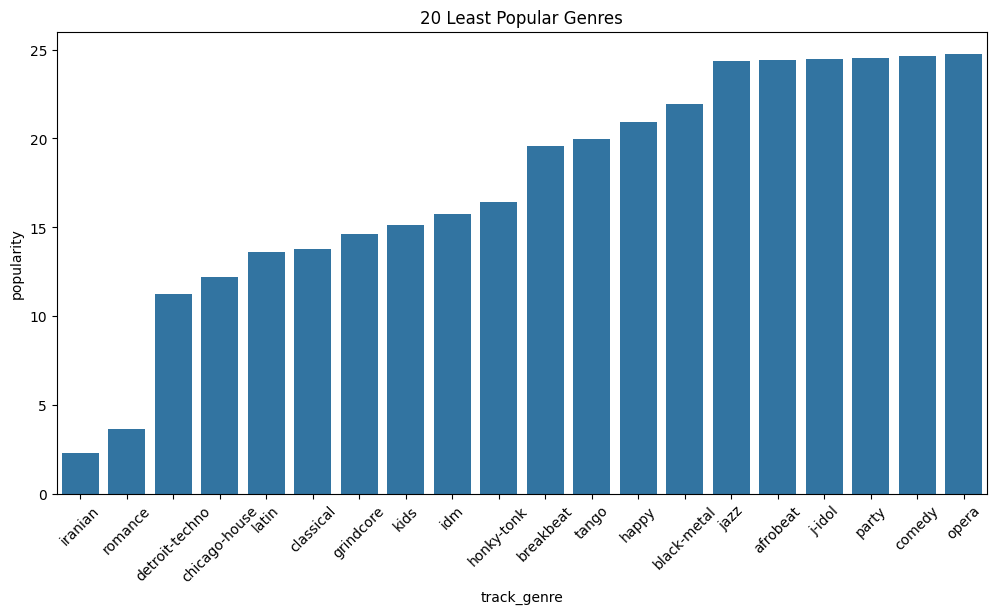

In [107]:
# 20 least popular genres
low_genres = data.groupby('track_genre')['popularity'].mean().sort_values(ascending=True).head(20)
low_genres = low_genres.reset_index()

plt.figure(figsize=(12, 6))
sns.barplot(x='track_genre', y='popularity', data=low_genres)
plt.title('20 Least Popular Genres')
plt.xticks(rotation=45)
plt.show()

# Ranged Columns are:
- Duration (min)
- Danceability
- Energy
- Loudness
- Speechiness
- Acousticness
- Instrumentalness
- Liveness
- Valence
- Tempo

Correlation coefficient for duration (min): -0.05609230231449575


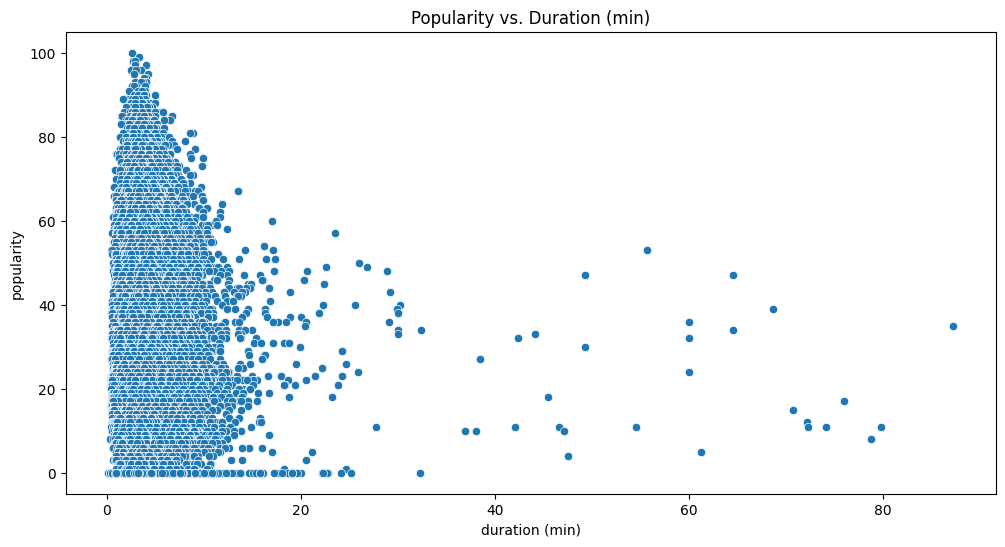

In [108]:
corr = np.corrcoef(data['duration (min)'], data['popularity'])[0, 1]
print("Correlation coefficient for duration (min):", corr)
plt.figure(figsize=(12, 6))
sns.scatterplot(x='duration (min)', y='popularity', data=data)
plt.title('Popularity vs. Duration (min)')
plt.show()

In [109]:
# Top 10 longest tracks
data.sort_values(by='duration (min)', ascending=False).head(10)


,artists,track_name,popularity,duration (min),explicit,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre
73617,Tale Of Us,Unity (Voyage Mix) Pt. 1,35,87.288250,False,0.6950,0.736,5,-11.371,0,0.0374,0.00399,0.8600,0.0910,0.05090,124.001,4,minimal-techno
10935,Timo Maas,Crossing Wires 002 - Continuous DJ Mix,11,79.817100,False,0.6970,0.632,1,-12.469,1,0.0451,0.00815,0.8710,0.0998,0.15100,121.055,4,breakbeat
24348,Seth Troxler,The Lab 03 - Continuous DJ Mix Part 1,8,78.838367,False,0.6840,0.656,5,-11.163,0,0.0633,0.01910,0.8480,0.1030,0.30100,123.180,4,detroit-techno
73840,Loco Dice,Amnesia Ibiza Underground 10 DJ Mix,17,76.064950,False,0.7830,0.728,10,-10.176,0,0.0612,0.00158,0.8400,0.1580,0.18900,125.044,4,minimal-techno
13344,Mark Farina,House of Om - Mark Farina - Continuous Mix,11,74.125333,False,0.8610,0.805,11,-6.461,0,0.0711,0.00548,0.5770,0.1350,0.54500,129.306,4,chicago-house
13245,Mark Farina,Live In Tokyo - Continuous Mix,11,72.330433,False,0.8060,0.582,1,-12.181,1,0.0874,0.00830,0.2370,0.3280,0.68600,128.368,4,chicago-house
13195,Mark Farina,Greenhouse Construction,12,72.245350,False,0.8460,0.744,10,-9.260,0,0.0611,0.00371,0.3350,0.3130,0.53200,125.434,4,chicago-house
27926,Lenzman;Dan Stezo,"NQ State of Mind, Vol. 1 - Continuous DJ Mix",15,70.770100,True,0.5930,0.924,1,-3.979,1,0.0899,0.00369,0.0221,0.5340,0.24200,173.938,4,drum-and-bass
101390,Ocean Sounds,Ocean Waves Sounds,39,68.670967,False,0.0797,0.995,1,-17.379,1,0.0612,0.93200,0.5620,0.3100,0.00001,84.788,3,sleep
45063,Estas Tonne,Internal Flight (Remastered),47,64.604600,False,0.3000,0.640,4,-9.266,0,0.0367,0.94600,0.8930,0.0783,0.21200,159.624,4,guitar


Correlation coefficient for duration: -0.04822119264394439


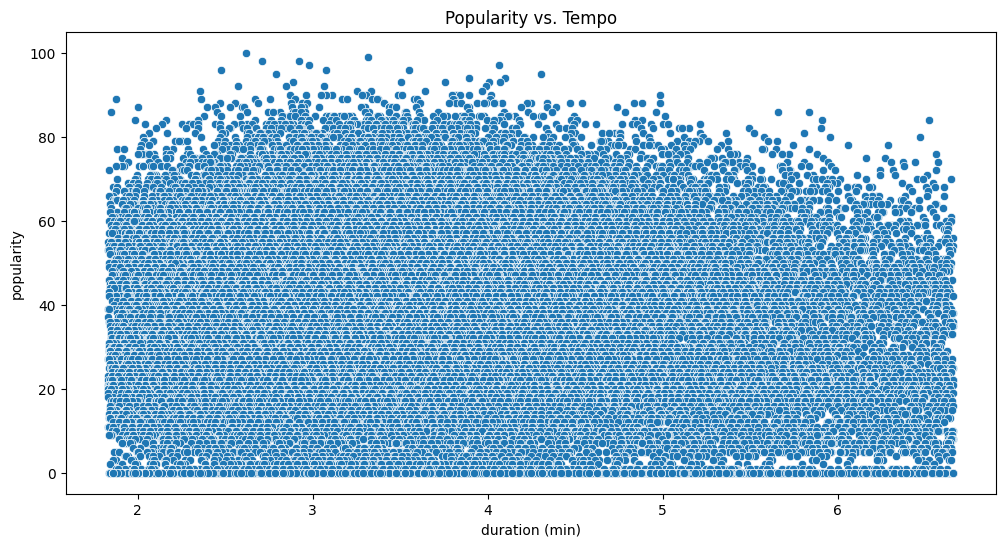

In [110]:
durr = data[(data['duration (min)'] > data['duration (min)'].quantile(0.05)) & (data['duration (min)'] < data['duration (min)'].quantile(0.95))]

corr = np.corrcoef(durr['duration (min)'], durr['popularity'])[0, 1]
print("Correlation coefficient for duration:", corr)
plt.figure(figsize=(12, 6))
sns.scatterplot(x='duration (min)', y='popularity', data=durr)
plt.title('Popularity vs. Tempo')
plt.show()

In [111]:
ranged = ['danceability', 'energy', 'loudness', 'speechiness', 'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo']

Correlation coefficient for danceability : 0.09581998046184598


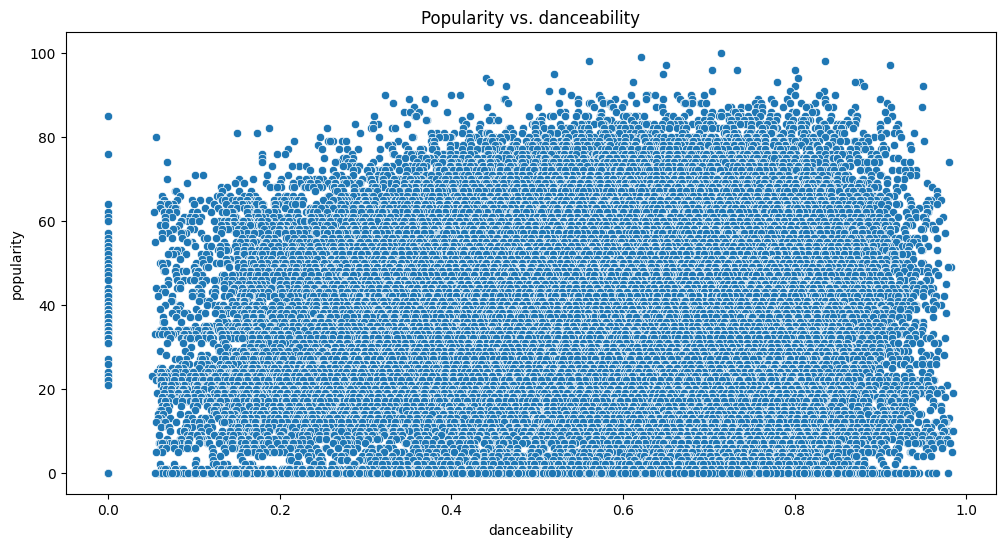

Correlation coefficient for energy : 0.006248048431984909


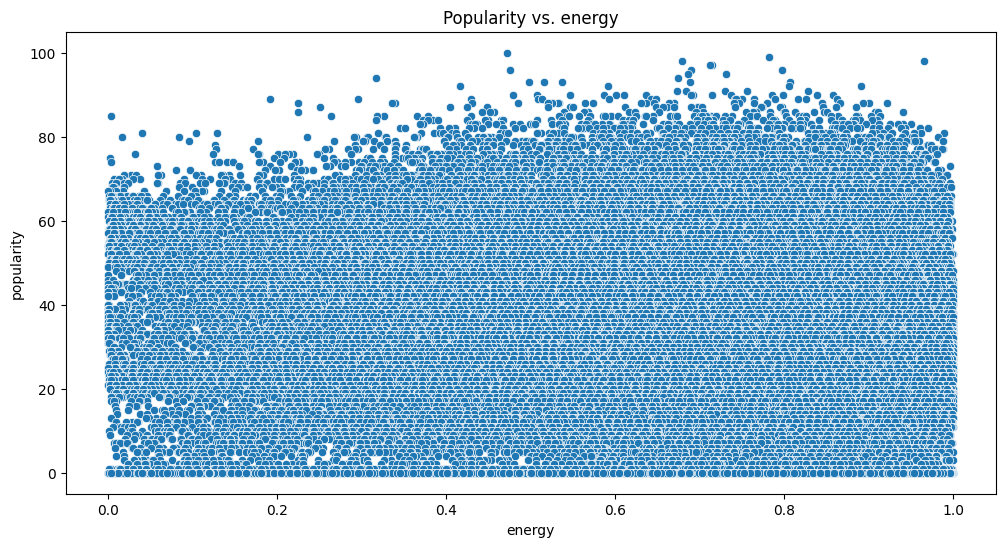

Correlation coefficient for loudness : 0.10098704831578


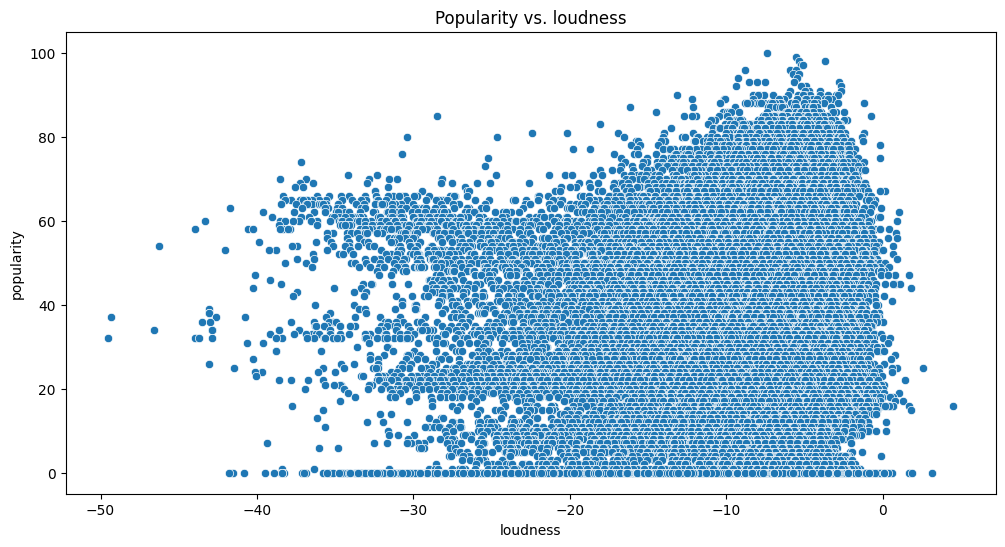

Correlation coefficient for speechiness : -0.06988971415272624


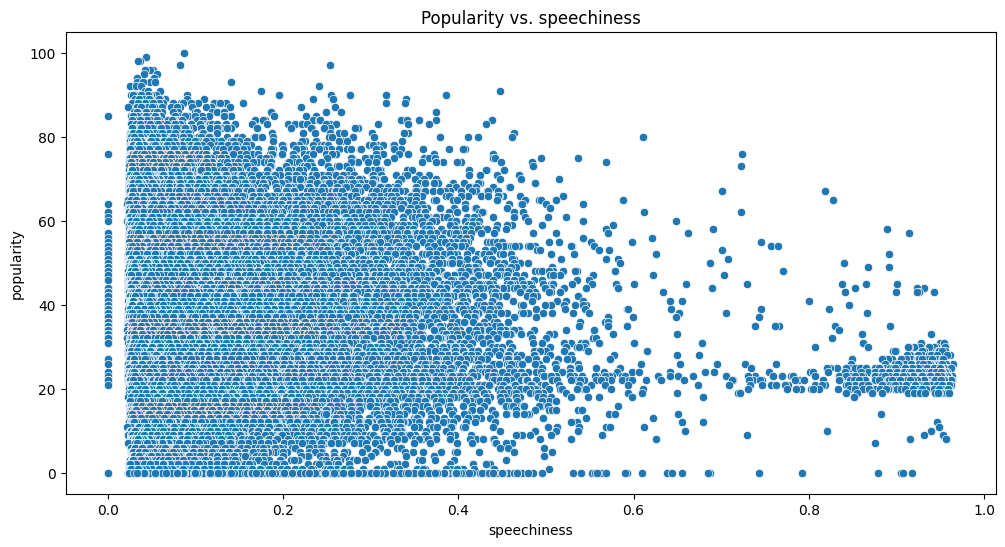

Correlation coefficient for acousticness : -0.04279033492530899


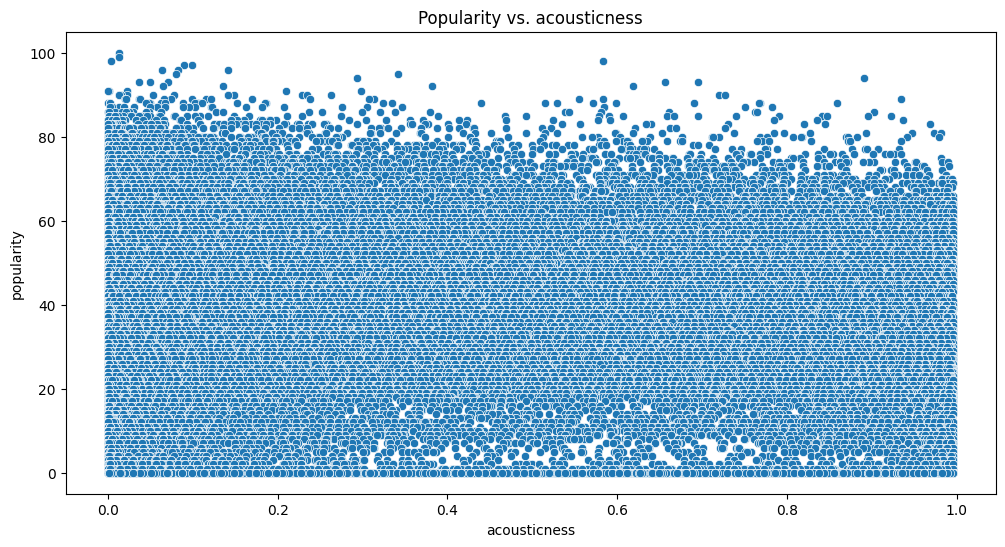

Correlation coefficient for instrumentalness : -0.18768478033637664


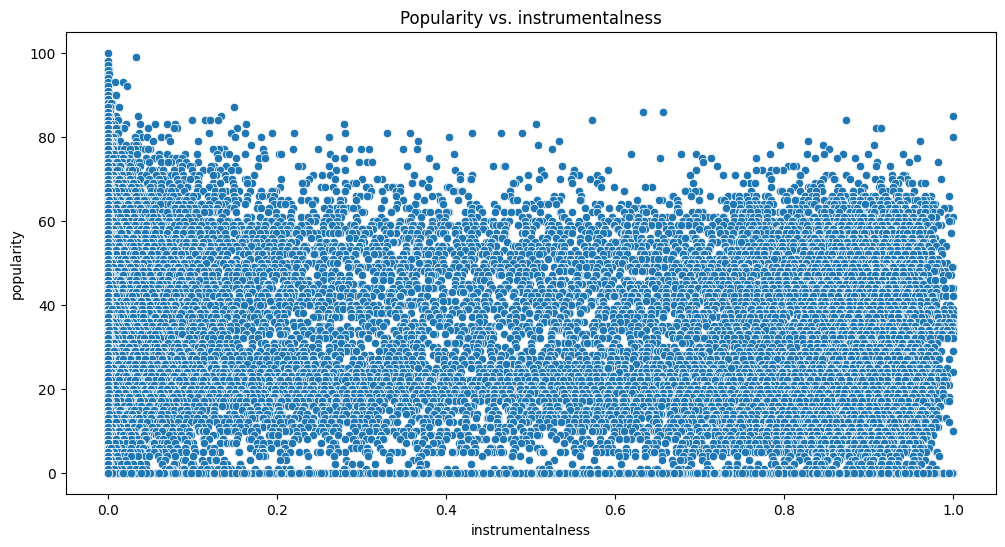

Correlation coefficient for liveness : -0.03579484716385196


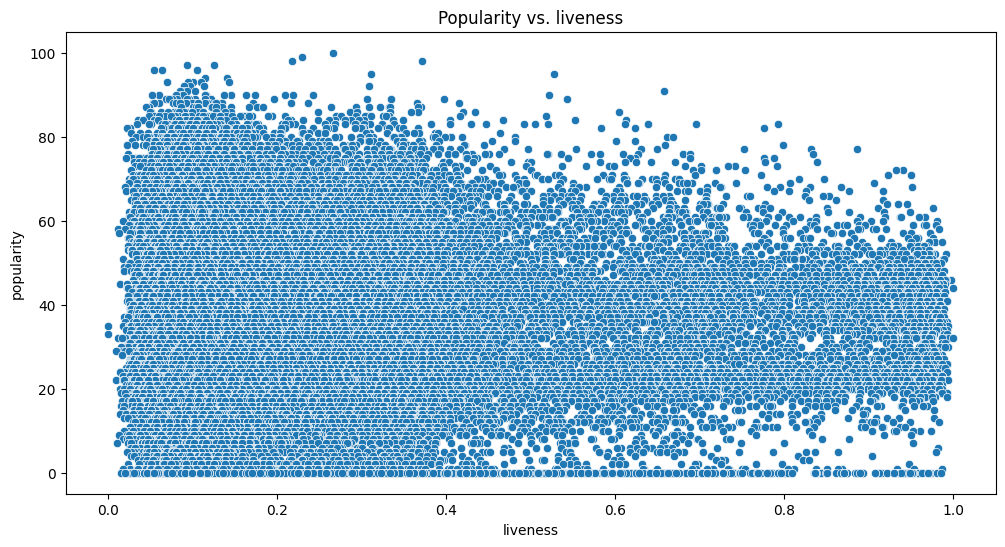

Correlation coefficient for valence : 0.02092850789823224


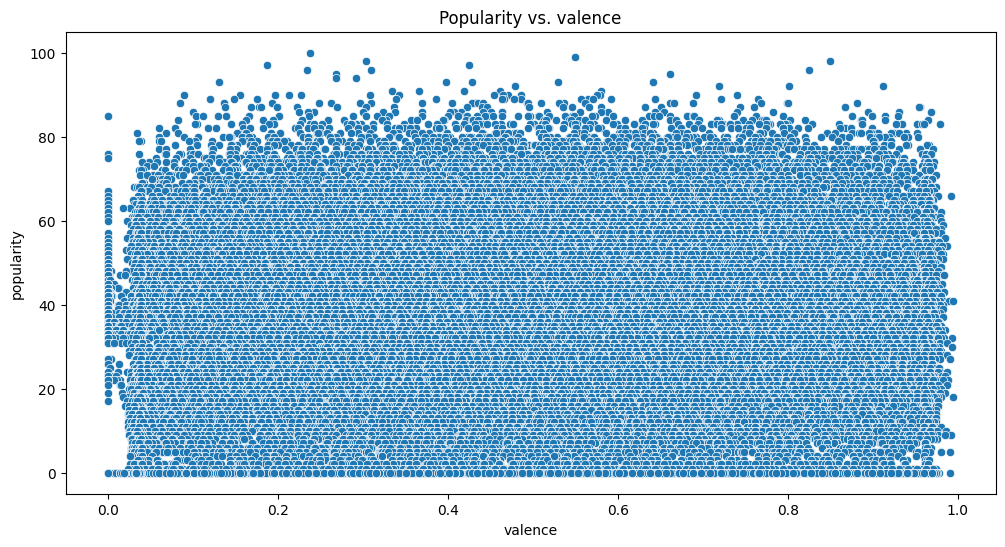

Correlation coefficient for tempo : 0.0004140015993580552


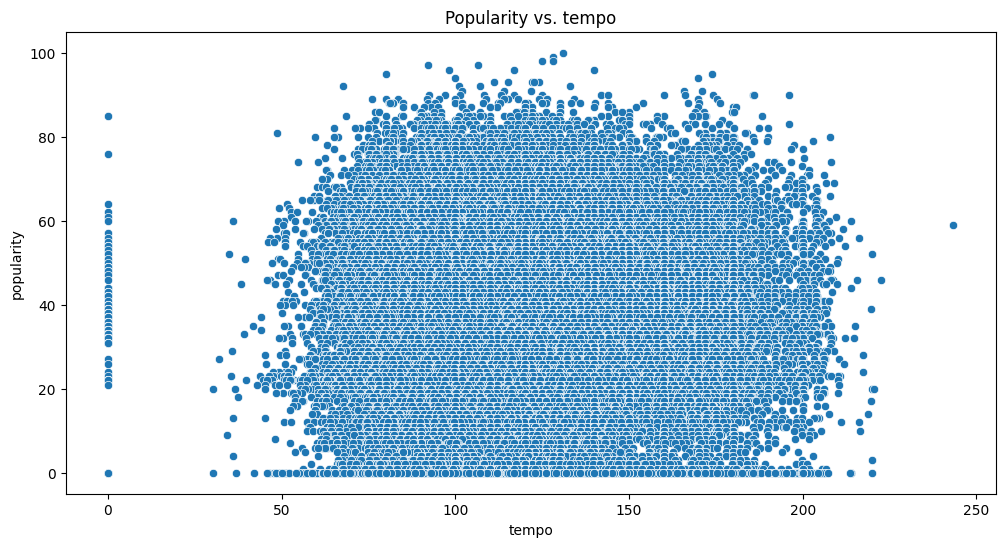

In [112]:
for col in ranged:
    corr = np.corrcoef(data[col], data['popularity'])[0, 1]
    print("Correlation coefficient for", col, ":", corr)
    plt.figure(figsize=(12, 6))
    sns.scatterplot(x=col, y='popularity', data=data)
    plt.title('Popularity vs. ' + col)
    plt.show()

# Few insights to provide the key to success in song writing

- Explicity adds a bit to popularity, maybe sprinkle a few choice words in

- Utilize a time signature of 4 or keep it free-flowing

- Genre can play heavily into your song's popularity
    - Pop
    - k-pop
    - Metal
    - Electro
    - Sad
    - Anime

- Avoid specific genres such as
    - Romance
    - Detroit-techno
    - Grindcore
    - Honky-tonk
    - Happy
    - Opera

- Keep the duration short, between 2 and 5 minutes

- Slight correlation between danceability, energy and popularilty

- Don't speak too much

- Keep the tempo between 75 and 200 bpm

An example of this could be:
- A 5 minute, free-flowing, sad song with just a few curse words as the lyrics that you could easily dance to.
